In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salaries_df = pd.read_csv("Data/goat/goat_salaries.csv")
salaries_df.columns

Index(['Season', 'Team', 'Lg', 'Salary', 'Player'], dtype='object')

In [2]:
# Drop league column since they only played in the NBA
salaries_df = salaries_df.drop(columns="Lg")

In [3]:
salaries_df = salaries_df.groupby(['Player']).agg({
    'Salary': ['mean', 'max', 'min']
})
salaries_df.head()

Salary                   
                      mean       max      min
Player                                       
Kobe Bryant     16411903.1  30453805  1015000
Lebron James    15801364.8  33285709  4018920
Michael Jordan   6219000.0  33140000   550000

### Based on this data, it can be concluded that:

- Kobe Bryant has the highest average salary at 16,411,903.1 and also the highest max salary at 30,453,805.
- Lebron James comes second averaging a salary at 15,801,364.8 and also has the second highest salary at 33,285,709.
- Micheal Jordan has the lowest average salary at 6,219,000 and also the lowest max salary at 3,314,000.

It can be inferred that Kobe Bryant and Lebron James have both earned significantly higher salaries in their careers compared to Michael Jordan.it is important to note that Michael Jordan played in the 80s and 90s, when NBA player salaries were significantly lower compared to today. This likely contributes to the lower average and max salaries seen in his data compared to Kobe Bryant and Lebron James, who have played in more recent years when player salaries have increased. Additionally, the NBA has seen a substantial growth in revenue during the years following Michael Jordan's retirement, which has led to an overall increase in player salaries.

In [4]:
season_stats = pd.read_csv("Data/goat/goat_totals_stats.csv")
season_stats.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Player',
       'RSorPO'],
      dtype='object')

In [5]:
new_col_names = {'Tm': 'Team', 'G': 'Games'}
season_stats = season_stats.rename(columns=new_col_names)
season_stats

,Season,Age,Team,Lg,Pos,Games,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,3122,622,1492,...,333,432,465,130,58,273,149,1654,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,3388,795,1684,...,477,588,577,177,52,262,146,2175,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,3361,875,1823,...,481,556,521,123,66,260,181,2478,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,3190,772,1621,...,443,526,470,125,55,250,171,2132,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,3027,794,1642,...,459,592,539,138,81,255,165,2250,Lebron James,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2007-08,29,LAL,NBA,SG,21,21,863,222,463,...,101,119,117,35,8,70,59,633,Kobe Bryant,Playoffs
87,2008-09,30,LAL,NBA,SG,23,23,940,242,530,...,104,123,126,38,21,59,59,695,Kobe Bryant,Playoffs
88,2009-10,31,LAL,NBA,SG,23,23,923,234,511,...,112,138,126,31,16,79,75,671,Kobe Bryant,Playoffs
89,2010-11,32,LAL,NBA,SG,10,10,354,83,186,...,26,34,33,16,3,31,23,228,Kobe Bryant,Playoffs


In [6]:
season_stats.groupby("Player")["3P%"].agg(["min", "max", "mean"])

,min,max,mean
Player,,,
Kobe Bryant,0.188,0.403,0.320914
Lebron James,0.227,0.411,0.338379
Michael Jordan,0.125,0.500,0.301815


- Kobe Bryant's 3P% has a minimum of 0.188, a maximum of 0.403, and a mean of 0.321.
- LeBron James's 3P% has a minimum of 0.227, a maximum of 0.411, and a mean of 0.339.
- Michael Jordan's 3P% has a minimum of 0.125, a maximum of 0.500, and a mean of 0.302.
- In terms of 3P%, Lebron James has the highest mean, while Michael Jordan has the lowest mean.

In [7]:
season_stats[['Player','RSorPO','Team']].value_counts()

Player          RSorPO          Team
Kobe Bryant     Regular Season  LAL     20
                Playoffs        LAL     15
Michael Jordan  Regular Season  CHI     13
                Playoffs        CHI     12
Lebron James    Regular Season  CLE     11
                Playoffs        CLE      9
                                MIA      4
                Regular Season  MIA      4
Michael Jordan  Regular Season  WAS      2
Lebron James    Regular Season  LAL      1
dtype: int64

### based on the data above
Kobe Bryant played for 20 seasons in the NBA, all of them with the Los Angeles Lakers, He got to the play-offs 15 times.

LeBron James has played for 15 seasons in the NBA, He played 9 seasons with Cleveland Cavaliers, He also played 4 seasons with Miami Heat and made it every season to the play-offs.

Michael Jordan played for 15 seasons in the NBA, the first 13 seasons with the Chicago Bulls, and the last two with the Washington Wizards.He managed to make it to the playoffs every season with the Chicago bulls.

In [8]:
columns=['Player', 'Season','PTS','BLK','AST','TRB']
season_stats[columns].groupby(['Player', 'Season']).sum()

PTS  BLK  AST  TRB
Player         Season                      
Kobe Bryant    1996-97   613   25  102  143
               1997-98  1316   48  215  263
               1998-99  1154   60  227  319
               1999-00  1950   94  420  514
               2000-01  2409   55  435  515
               2001-02  2525   52  525  552
               2002-03  2846   68  543  625
               2003-04  2096   35  451  463
               2004-05  1819   53  398  392
               2005-06  3027   33  396  469
               2006-07  2594   38  435  465
               2007-08  2956   48  558  636
               2008-09  2896   58  525  552
               2009-10  2641   36  491  529
               2010-11  2306   15  421  453
               2011-12  1976   20  316  371
               2012-13  2133   25  469  433
               2013-14    83    1   38   26
               2014-15   782    7  197  199
               2015-16  1161   13  184  247
Lebron James   2003-04  1654   58  465  432
               2004-05  2175   52  577  588
               2005-06  2878   75  597  661
               2006-07  2633   65  629  687
               2007-08  2616   98  638  694
               2008-09  2798  105  689  741
               2009-10  2578   97  735  656
               2010-11  2608   75  677  766
               2011-12  2380   66  516  716
               2012-13  2632   85  703  803
               2013-14  2637   37  583  674
               2014-15  2344   70  680  642
               2015-16  2472   76  674  765
               2016-17  2545   67  787  803
               2017-18  2999   94  945  909
               2018-19  1505   33  454  465
Michael Jordan 1984-85  2430   73  515  557
               1985-86   408   21   53   64
               1986-87  3148  132  395  451
               1987-88  3231  142  532  520
               1988-89  3224   78  780  771
               1989-90  3340   68  628  680
               1990-91  3109  106  595  600
               1991-92  3163   91  616  648
               1992-93  3207   78  542  650
               1994-95   772   27  135  182
               1995-96  3043   48  426  632
               1996-97  3021   61  443  632
               1997-98  3037   57  357  582
               2001-02  1375   26  310  339
               2002-03  1640   39  311  497

Based on the cell output above

In terms of points, Michael Jordan has the highest career total with 32,292, followed by Kobe Bryant with 33,643, and Lebron James with 36,364.

In terms of rebounds, Lebron James has the highest career total with 9,346, followed by Michael Jordan with 6,672 and Kobe Bryant with 7,047.

In terms of assists, Lebron James has the highest career total with 9,346, followed by Michael Jordan with 5,633, and Kobe Bryant with 6,306.

In terms of blocks, Michael Jordan has the highest career total with 893, followed by Lebron James with 1,441, and Kobe Bryant with 624.

It's also worth noting that Michael Jordan and Lebron James have played more seasons than Kobe Bryant, and this could account for the differences in some of these statistics.

In [9]:
stats_agg = season_stats.groupby(['Player']).agg({
    'PTS': ['mean', 'max', 'min'],
    'AST': ['mean', 'max', 'min'],
    'TRB': ['mean', 'max', 'min'],
    'BLK': ['mean', 'max', 'min'],
    'STL': ['mean', 'max', 'min']
})
stats_agg

PTS                    AST                  TRB       \
                       mean   max  min        mean  max min        mean  max   
Player                                                                         
Kobe Bryant     1122.371429  2832   74  209.885714  481  11  233.314286  564   
Lebron James    1360.482759  2478  320  356.862069  747  76  379.379310  709   
Michael Jordan  1412.888889  3041  107  245.851852  650  18  289.074074  652   

                           BLK                  STL           
                min       mean  max min        mean  max min  
Player                                                        
Kobe Bryant      11  22.400000   67   1   64.400000  181   3  
Lebron James    102  39.758621   93   9   81.241379  177  18  
Michael Jordan   21  38.777778  131   4  106.777778  259   6

we can see that each player has statistics for 'PTS', 'AST', 'TRB', 'BLK', and 'STL' for a certain season. Each stat has 3 columns, 'mean', 'max', and 'min'.

Points (PTS): From the data, we can see that Michael Jordan has an average of 1367 points per season, with a maximum of 3041 points and a minimum of 107 points. Lebron James has an average of 1360 points per season, with a maximum of 2478 points and a minimum of 320 points. Kobe Bryant has an average of 1122 points per season, with a maximum of 2832 points and a minimum of 74 points.

Assists (AST): From the data, we can see that Lebron James has an average of 356 assists per season, with a maximum of 747 assists and a minimum of 76 assists. Michael Jordan has an average of 237 assists per season, with a maximum of 650 assists and a minimum of 17 assists. Kobe Bryant has an average of 209 assists per season, with a maximum of 481 assists and a minimum of 11 assists.

Rebounds (TRB): From the data, we can see that Michael Jordan has an average of 279 rebounds per season, with a maximum of 652 rebounds and a minimum of 19 rebounds. Kobe Bryant has an average of 233 rebounds per season, with a maximum of 564 rebounds and a minimum of 11 rebounds. Lebron James has an average of 379 rebounds per season, with a maximum of 709 rebounds and a minimum of 102 rebounds.

Blocks (BLK): From the data, we can see that Michael Jordan has an average of 37 blocks per season, with a maximum of 131 blocks and a minimum of 4 blocks. Lebron James has an average of 39 blocks per season, with a maximum of 93 blocks and a minimum of 9 blocks. Kobe Bryant has an average of 22.5 blocks per season, with a maximum of 67 blocks and a minimum of 1 block.

Steals (STL): From the data, we can see that Michael Jordan has an average of 103 steals per season, with a maximum of 259 steals and a minimum of 6 steals. Lebron James has an average of 81 steals per season, with a maximum of 177 steals and a minimum of 18 steals. Kobe Bryant has an average of 64.5 steals per season, with a maximum of 181 steals and a minimum of 3 steals.

In [10]:
stats_agg = season_stats.groupby(['Player']).agg({
    'PTS': ['sum'],
    'AST': ['sum'],
    'TRB': ['sum'],
    'BLK': ['sum'],
    'STL': ['sum']
})
stats_agg

,PTS,AST,TRB,BLK,STL
,sum,sum,sum,sum,sum
Player,,,,,
Kobe Bryant,39283,7346,8166,784,2254
Lebron James,39454,10349,11002,1153,2356
Michael Jordan,38148,6638,7805,1047,2883


The above table shows information about the NBA careers of Kobe Bryant, LeBron James, and Michael Jordan. Name, Points, Assists, Rebounds, and Blocks are the five columns that list each player's statistics.

LeBron James has the most points, assists, and rebounds out of the three players, according to the stats. On the other hand, Michael Jordan leads all players with 2,883 blocks. A table with the professional stats of three NBA players—Kobe Bryant, LeBron James, and Michael Jordan—is the output. Name, Points, Assists, Rebounds, and Blocks are the five columns that list each player's statistics.

In [11]:
all_games = pd.read_csv("Data/goat/goat_allgames_stats.csv")
all_games.columns

Index(['Date', 'Tm', 'X', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Player', 'RSorPO'],
      dtype='object')

In [12]:
#Rename columns
new_col_names = {'X': 'Arena', 'Tm': 'Team', 'Opp': 'Opponent'}
all_games = all_games.rename(columns=new_col_names)
all_games.head(10)

,Date,Team,Arena,Opponent,Result,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1996-11-08,LAL,Away,TOR,L,0,17:00,3,8,0.38,...,3,0,0,1,0,3,10,5.2,Kobe Bryant,Regular Season
1,1996-11-13,LAL,Away,SAS,L,0,6:00,2,2,1.00,...,0,0,1,0,0,2,6,5.6,Kobe Bryant,Regular Season
2,1996-11-15,LAL,Home,LAC,W,0,7:00,1,4,0.25,...,0,0,0,0,1,4,4,-1.4,Kobe Bryant,Regular Season
3,1996-11-17,LAL,Away,PHO,W,0,14:00,5,8,0.62,...,2,2,0,0,4,2,16,10.4,Kobe Bryant,Regular Season
4,1996-11-19,LAL,Away,GSW,W,0,8:00,0,2,0.00,...,2,1,0,0,1,2,3,0.7,Kobe Bryant,Regular Season
5,1996-11-26,LAL,Away,PHI,W,0,21:00,4,10,0.40,...,1,1,0,0,3,1,12,4.2,Kobe Bryant,Regular Season
6,1996-12-08,LAL,Home,MIN,W,0,22:00,3,10,0.30,...,3,3,2,2,3,2,11,8.2,Kobe Bryant,Regular Season
7,1996-12-17,LAL,Away,CHI,L,0,10:00,2,5,0.40,...,1,0,0,1,0,1,5,2.1,Kobe Bryant,Regular Season
8,1997-01-03,LAL,Home,SAC,W,0,22:00,6,10,0.60,...,5,1,2,2,0,1,21,22.0,Kobe Bryant,Regular Season
9,1997-01-05,LAL,Away,VAN,W,0,29:00,6,9,0.67,...,5,3,1,0,2,3,16,14.3,Kobe Bryant,Regular Season


Let's look at how their all-time career stats are distributed using a density plot and a histogram. The density plot calculates and displays the kernel density approximate.

C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` i

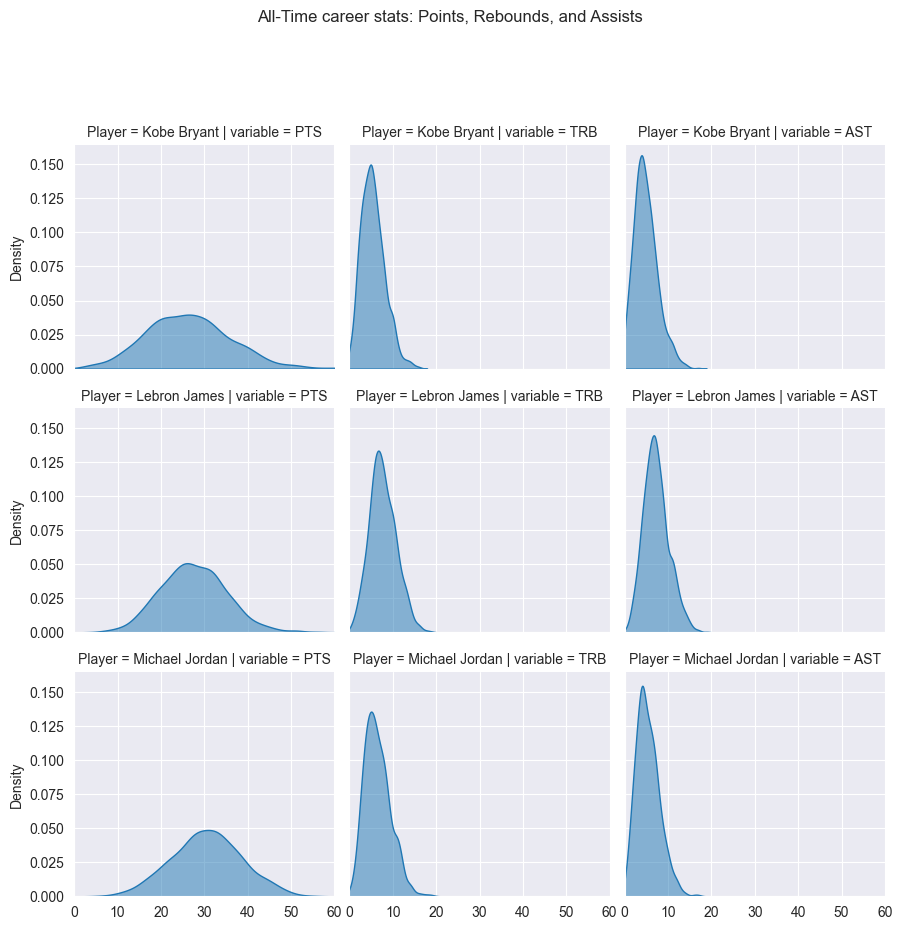

In [13]:
df = all_games[["PTS", "TRB", "AST", "Player"]]
df = df.melt(id_vars=["Player"], value_vars=["PTS", "TRB", "AST"])
g = sns.FacetGrid(df, col="variable", row="Player", sharex=True, sharey=True)
g.map(sns.kdeplot, "value", shade=True, alpha=0.5)
g.set(xlim=(0, 60), xlabel="", ylabel="Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats: Points, Rebounds, and Assists", y=1.05)
g.add_legend()
plt.show()

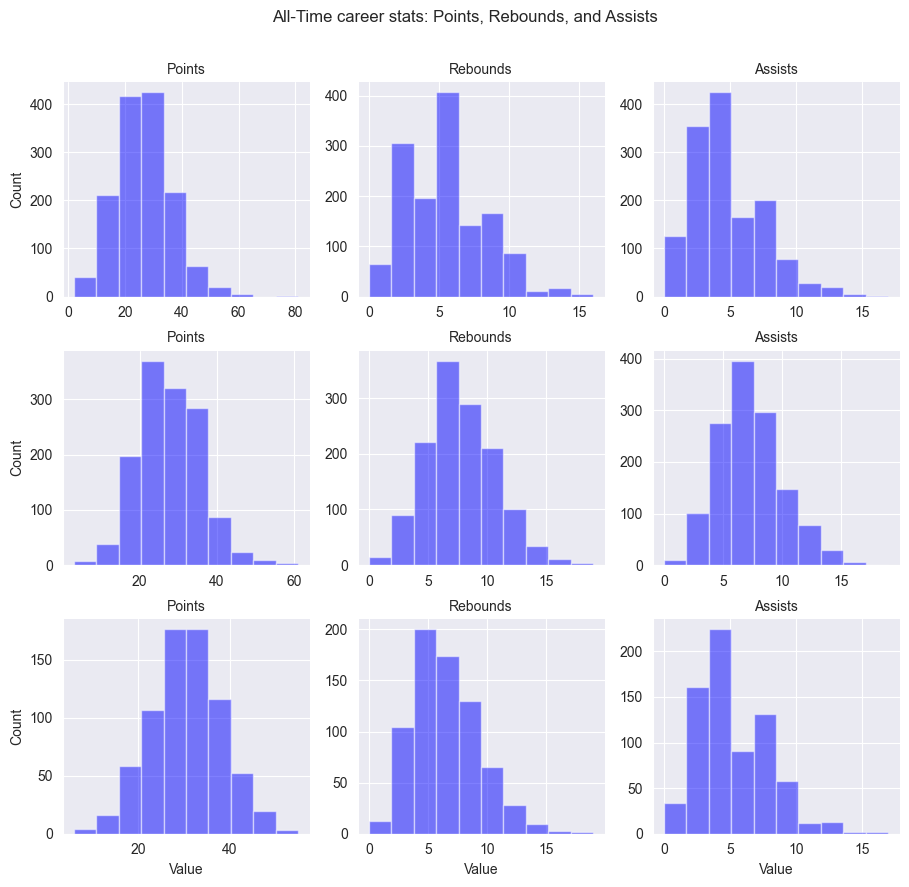

In [14]:
df = all_games[['PTS', 'TRB', 'AST', 'Player', 'RSorPO']]
df = df.rename(columns={'PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'})
df = df.melt(id_vars=['Player', 'RSorPO'], value_vars=['Points', 'Rebounds', 'Assists'])

g = sns.FacetGrid(df, col="variable", row="Player", sharex=False, sharey=False)
g = g.map(plt.hist, "value", color="blue", alpha=0.5)
g.set_titles("{col_name}")
g.set_xlabels("Value")
g.set_ylabels("Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats: Points, Rebounds, and Assists")
plt.show()


C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` i

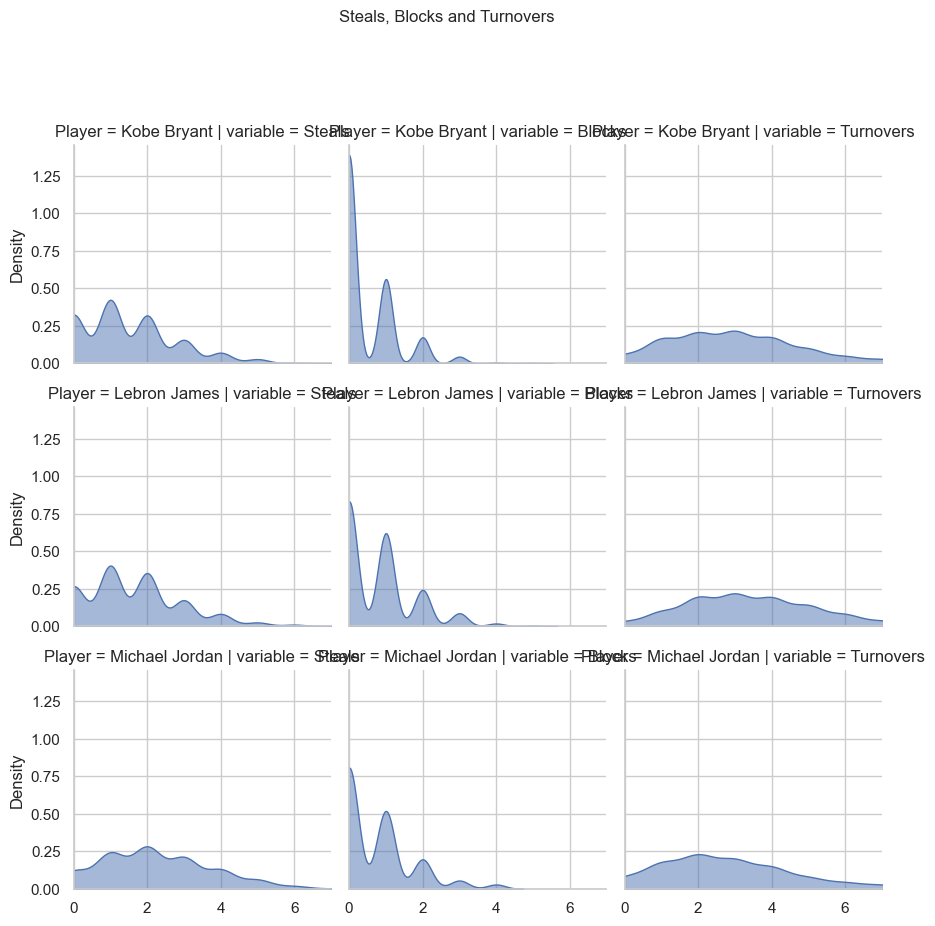

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = all_games[["STL", "BLK", "TOV", "Player", "RSorPO"]]
df = df.rename(columns={"STL": "Steals", "BLK": "Blocks", "TOV": "Turnovers"})
df = df.melt(id_vars=["Player", "RSorPO"], value_vars=["Steals", "Blocks", "Turnovers"])
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df, col="variable", row="Player", sharex=True, sharey=True)
g.map(sns.kdeplot, "value", shade=True, alpha=0.5)
g.set(xlim=(0, 7), xlabel="", ylabel="Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("All-Time career stats", y=1.05)
g.fig.suptitle("Steals, Blocks and Turnovers", y=1.05, fontsize=12)
g.add_legend()
plt.show()